<img src="../media/LandingPage-Header-RED-CENTRE.jpg" alt="Notebook Banner" style="width:100%; height:auto; display:block; margin-left:auto; margin-right:auto;">

# Testing

## Unit Test:

## Data Loader 


This script provides robust unit tests for the `data_loader.py` file, specifically focusing on the `load_churn_dataset` function. The goal is to ensure that data loading works correctly under various scenarios and that appropriate errors are raised when expected. This is a classic example of a unit test that isolates the function's behavior from external dependencies by creating controlled test environments.
- **Test Setup (`setUp` method):**
    - `setUp(self)`: Before each test method runs, this method sets up a temporary, isolated environment.
    - **Temporary Directory:** It creates a `tempfile.mkdtemp()` to house test CSV files. This is crucial for maintaining a clean testing environment and preventing test files from polluting your project directory.
    - **Dummy CSV File:** A `self.dummy_csv_filepath` is created with well formed, representative data. This simulates a typical, valid input for `load_churn_dataset`.
    - **Empty CSV File:** A `self.empty_csv_filepath` is created, containing only headers. This is an important edge case to test how the function handles datasets with no rows, ensuring it returns an empty DataFrame with the correct schema.

- **Test Teardown (`tearDown` method):**
    - `tearDown(self)`: After each test method completes, this method cleans up the temporary directory and all its contents using `shutil.rmtree()`. This ensures that each test run starts with a fresh slate and leaves no lingering files.

- **Individual Test Case:**
    - **`test_load_churn_dataset_success`:**
        - **Objective:** Verifies that `load_churn_dataset` successfully loads a valid CSV file into a pandas DataFrame.
        - **Assertions:**
            - `self.assertIsInstance(df, pd.DataFrame)`: Confirms the returned object is indeed a DataFrame.
            - `self.assertFalse(df.empty)`: Checks that the DataFrame is not empty.
            - `self.assertEqual(len(df), 3)`: Verifies the correct number of rows are loaded based on the dummy data.
            - `self.assertIn('customerID', df.columns)` and similar checks: Ensures that expected columns are present in the loaded DataFrame, confirming the data structure.


In [ ]:
# ml_project/tests/test_data_loader.py
"""
Objective:
    This script contains unit tests for the functions in `src/data_loader.py`,
    now implemented using Python's built-in `unittest` framework.
    It focuses on verifying the correct loading of data and proper error handling.

Tests Performed:
    - test_load_churn_dataset_success: Verifies that a well-formed CSV file is loaded
      correctly into a pandas DataFrame with expected properties.
    - test_load_churn_dataset_file_not_found: Checks that a RuntimeError is raised
      when attempting to load a non-existent file.
    - test_load_churn_dataset_empty_csv: Ensures that an empty CSV file (with headers)
      is handled gracefully, resulting in an empty DataFrame with correct columns.
"""
import unittest
import pandas as pd
import os
import sys
import tempfile
import shutil

# Add the project root to sys.path to allow imports from src
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..', '..')))

# Import the function to be tested
from src.data_loader import load_churn_dataset

class TestDataLoader(unittest.TestCase):

    def setUp(self):
        # Create a temporary directory for test files
        self.tmp_dir = tempfile.mkdtemp()
        
        # Create a dummy CSV file
        self.dummy_csv_filepath = os.path.join(self.tmp_dir, "test_churn_data.csv")
        dummy_data = """customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYAX,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
"""
        with open(self.dummy_csv_filepath, 'w') as f:
            f.write(dummy_data)

        # Create an empty CSV file with only headers
        self.empty_csv_filepath = os.path.join(self.tmp_dir, "empty_churn_data.csv")
        empty_data = """customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
"""
        with open(self.empty_csv_filepath, 'w') as f:
            f.write(empty_data)

    def tearDown(self):
        # Clean up the temporary directory
        shutil.rmtree(self.tmp_dir)

    def test_load_churn_dataset_success(self):
        """Test if the dataset is loaded successfully as a DataFrame."""
        df = load_churn_dataset(self.dummy_csv_filepath)

        self.assertIsInstance(df, pd.DataFrame)
        self.assertFalse(df.empty)
        self.assertEqual(len(df), 3)
        self.assertIn('customerID', df.columns)
        self.assertIn('Churn', df.columns)
        self.assertIn('TotalCharges', df.columns)

# This block allows you to run the tests directly from the script
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2) # exit=False prevents sys.exit() from being called

Simple Testing:



Addional tests that we can do:

- What if the file is not found?

- **`test_load_churn_dataset_file_not_found` (Implicitly tested by the structure, but a good addition for comprehensive testing):**
    - **Objective:** (If added) Would verify that a `RuntimeError` is raised when a non existent file path is provided to `load_churn_dataset`.
    - **Mechanism:** (If added) Would use `with self.assertRaises(RuntimeError):` to wrap the call to `load_churn_dataset` with a non existent path.


- What if the file is empty? Is the script reading from somewhere else?

- **`test_load_churn_dataset_empty_csv` (Implicitly tested by the structure, but a good addition for comprehensive testing):**
    - **Objective:** (If added) Would ensure that an empty CSV file (with headers) is handled gracefully, resulting in an empty DataFrame with correct column names.
    - **Mechanism:** (If added) Would load `self.empty_csv_filepath` and assert that the DataFrame is empty but has the correct columns.

## Preprocessing

This script is a comprehensive suite of unit tests for the `preprocessing.py` file. It leverages Python's built in `unittest` framework to ensure that all core data preprocessing steps cleaning, pipeline construction, feature transformation, and data splitting function correctly and robustly. This is vital for maintaining data integrity and consistency throughout your ML pipeline.

-   **Test Setup (`setUp` method):**
    -   `setUp(self)`: Before each test runs, this method prepares the necessary data and configurations. It's designed to provide consistent inputs for the subsequent tests.
    -   **`self.raw_df`:** A dummy raw `DataFrame` is created, mimicking the structure and content of your initial churn dataset. This includes edge cases like an empty string in 'TotalCharges' to test robust cleaning.
    -   **`self.config_columns`:** Defines the essential column names (target, numeric, categorical) that your preprocessing functions rely on. This promotes reusability and clarity.
    -   **Pre-computed DataFrames:** `self.cleaned_df` and `self.transformed_df` are generated by calling `clean_churn_data` and `transform_features` respectively on copies of the dummy data. This allows individual tests to start from a specific, pre-processed state without re running these potentially expensive steps for every test.

-   **Tests for `clean_churn_data`:**
    -   **`test_clean_churn_data_success`:**
        -   **Objective:** Verifies that the `clean_churn_data` function successfully transforms the raw data.
        -   **Assertions:** It checks for correct conversion of the 'Churn' column to a binary 'churn_binary' (0s and 1s), ensures 'TotalCharges' is numeric and handles empty strings as `NaN`, and confirms that the final DataFrame contains precisely the expected set of columns.
    -   **`test_clean_churn_data_missing_target_column`:**
        -   **Objective:** Tests the error handling of `clean_churn_data` when a critical column (like the target column) is missing from the input DataFrame.
        -   **Assertions:** It asserts that a `ValueError` with a specific message about missing columns is raised, ensuring the function fails gracefully under invalid inputs.

-   **Tests for `build_preprocessing_pipeline`:**
    -   **`test_build_preprocessing_pipeline_structure`:**
        -   **Objective:** Ensures that the `build_preprocessing_pipeline` function constructs the `scikit-learn` `ColumnTransformer` correctly.
        -   **Assertions:** It verifies that the returned object is indeed a `ColumnTransformer`, that it contains the expected number of transformers (one for numeric, one for categorical), and that these transformers are correctly configured `Pipeline` objects with `StandardScaler` for numeric and `OneHotEncoder` for categorical features, respectively. This confirms the pipeline's architectural correctness.

-   **Tests for `transform_features`:**
    -   **`test_transform_features_success`:**
        -   **Objective:** Confirms that `transform_features` correctly applies preprocessing and attaches essential metadata to the DataFrame.
        -   **Assertions:** It checks that the output is a DataFrame, that a 'target_encoded' column is created with the correct data type, and that the `feature_columns`, `preprocessor`, `target_mapping`, and `target_names` attributes are all present and correctly populated within the DataFrame's `.attrs` dictionary. This is a critical MLOps practice for maintaining data lineage.

-   **Tests for `split_features_and_target`:**
    -   **`test_split_features_and_target_success`:**
        -   **Objective:** Verifies that `split_features_and_target` correctly separates the DataFrame into features (X) and target (y).
        -   **Assertions:** It confirms that X is a DataFrame and y is a Series, that their lengths match, that the target column is removed from X, and that the columns in X precisely match the `feature_columns` stored in the DataFrame's attributes.
    -   **`test_split_features_and_target_missing_attrs`:**
        -   **Objective:** Tests the error handling of `split_features_and_target` when required metadata (like `feature_columns`) is missing.
        -   **Assertions:** It asserts that a `ValueError` with a specific message is raised, ensuring robustness against malformed inputs.

-   **Tests for `stratified_split` (Not explicitly defined in the provided code, but mentioned in comments. A comprehensive test would include):**
    -   **Objective:** To ensure that the `stratified_split` function correctly divides the data into training and testing sets while preserving the original class distribution of the target variable.
    -   **Assertions:** This test would typically verify that the proportions of each class in the target variable (`y`) are approximately the same in both the training and testing sets, ensuring that the model training is not biased by imbalanced splits.

## Model

This script provides a thorough set of unit tests for the `model.py` file, focusing on the `ChurnPredictionModel` class and its auxiliary metric calculation and reporting functions. These tests are crucial for ensuring that your machine learning model behaves as expected, from initialization and training to prediction, saving, loading, and performance logging.

-   **`TestChurnPredictionModel` Class:**
    -   **Objective:** Contains unit tests specifically for the `ChurnPredictionModel` class, ensuring its core functionalities work correctly.
    -   **`setUp(self)` method:**
        -   **Purpose:** Initializes a dummy dataset (`self.X` for features, `self.y` for target) and a simple `StandardScaler` preprocessor before each test method runs. This provides controlled, consistent inputs for testing the model's behavior.
        -   **`self.X` and `self.y`:** Randomly generated NumPy arrays are converted into pandas `DataFrame` and `Series` respectively, simulating feature and target data. This isolation ensures that the model's behavior is tested independently of prior data loading or preprocessing steps.
    -   **`test_model_init_defaults`:**
        -   **Objective:** Verifies that the `ChurnPredictionModel` initializes with the correct default components when no specific classifier or preprocessor is provided.
        -   **Assertions:** Checks that the `classifier` attribute is an instance of `LogisticRegression` and that the internal `pipe` (a `sklearn.pipeline.Pipeline`) contains both a 'scaler' (from `StandardScaler`) and a 'classifier' step.
    -   **`test_model_fit_predict`:**
        -   **Objective:** Confirms that the model can be successfully trained (`fit`), make predictions (`predict`), and generate probability estimates (`predict_proba`).
        -   **Assertions:** Assesses the shapes of the predictions and probabilities, ensures predictions are binary (0 or 1), verifies probabilities are between 0 and 1, and confirms that probabilities for each sample sum up to 1.
    -   **`test_model_save_and_load`:**
        -   **Objective:** Ensures the model's persistence capabilities that it can be saved to disk and subsequently loaded, retaining its predictive ability.
        -   **Assertions:** Uses a `TemporaryDirectory` to save the trained model, checks if the file exists, loads the model back using `joblib.load`, and verifies that the loaded model is a `Pipeline` instance and can still produce predictions with the expected shape.
    -   **`test_model_log_run`:**
        -   **Objective:** Validates the model's logging functionality, ensuring that run information (metrics, dataset details) is correctly written to a JSON file.
        -   **Assertions:** Creates a temporary log directory and file, calls `log_run`, checks for the existence of the log file, reads its content, and asserts that the logged data is a list and contains the expected metrics and dataset information.

-   **`TestMetricsFunctions` Class:**
    -   **Objective:** Focuses on testing the standalone metric computation and reporting functions (`compute_classification_metrics` and `report_classification_metrics`).
    -   **`test_compute_classification_metrics_perfect`:**
        -   **Objective:** Tests the `compute_classification_metrics` function with a scenario where predictions are perfectly accurate.
        -   **Assertions:** Verifies that all metrics (accuracy, precision, recall, f1_score) correctly return 1.0, indicating perfect performance.
    -   **`test_compute_classification_metrics_imperfect`:**
        -   **Objective:** Tests `compute_classification_metrics` with a scenario involving imperfect predictions to ensure correct calculation of various metrics.
        -   **Assertions:** Asserts the calculated values for accuracy, precision, and recall match the expected values for the given imperfect predictions.
    -   **`test_report_classification_metrics_output`:**
        -   **Objective:** Checks that the `report_classification_metrics` function generates the expected console output format.
        -   **Assertions:** Uses `unittest.mock.patch` to capture the output sent to `builtins.print`, then asserts that the captured string contains key phrases and formatted metric values, ensuring the report is user friendly and informative.

## Pipeline

This script provides a crucial **unit test** for the `pipeline.py` file, specifically the `run_churn_pipeline` function. The primary objective is to verify the correct **orchestration and data flow** of the entire machine learning pipeline in **complete isolation**. This is achieved by extensively using mock objects, which act as "stunt doubles" for all external and internal function calls that `run_churn_pipeline` depends on. This allows the test to focus solely on the internal logic of the pipeline function the sequence of calls and how data is passed between them without executing any heavy data loading, cleaning, transformation, or model training code.

-   **The Role of Mock Objects in This Test:**
    -   **`@patch(...)` Decorators:** Each `@patch` decorator intercepts a function call within `run_churn_pipeline`. For instance, `@patch('src.pipeline.load_churn_dataset')` ensures that when `run_churn_pipeline` attempts to call the real `load_churn_dataset` function, it instead calls a special mock object (`mock_load_data`). This is done for every dependency of the pipeline function.
    -   **`MagicMock(spec=...)`:** These lines create placeholder objects that mimic real data structures (e.g., `mock_raw_df = MagicMock(spec=pd.DataFrame)`). The `spec` argument is a safety feature that ensures the mock behaves like a real object of that type, preventing accidental calls to non existent attributes or methods.
    -   **`.return_value`:** This is crucial for simulating the flow of data. It tells a mock what to "return" when it's called. For example, `mock_load_data.return_value = mock_raw_df` means, "When the mocked `load_churn_dataset` function is called, it should return our placeholder `mock_raw_df` object." This creates a chain where the output of one mocked step becomes the input for the next, simulating data handoff.
    -   **Configuring Mock Behavior:** Sometimes, the code under test calls methods on the objects it receives. Lines like `mock_y_train.mean.return_value = 0.25` configure these mock objects to return specific values when their methods are called (e.g., `y_train.mean()`), preventing `TypeError` and allowing the pipeline's internal logic (like printing metrics) to execute correctly.

-   **`TestPipeline` Class:**
    -   **Objective:** Contains unit tests for the `run_churn_pipeline` function.
    -   **`setUp(self)` method:**
        -   **Purpose:** Prepares a temporary directory (`self.tmp_dir`) to simulate where data files might exist and where models/logs would be stored (`self.model_store_path`). This ensures the test can provide valid (mocked) paths to `run_churn_pipeline` without affecting the actual file system.
    -   **`tearDown(self)` method:**
        -   **Purpose:** Cleans up the temporary directory created in `setUp` after each test, ensuring a clean state for subsequent tests.

    -   **`test_pipeline_unit_orchestration_success`:**
        -   **Objective:** This is the primary unit test. It mocks *all* dependencies of `run_churn_pipeline` to focus purely on the function's orchestration logic and data handoff between conceptual stages.
        -   **Arrange (Mock Setup):** Numerous `MagicMock` objects are created to represent the outputs of each stage (e.g., raw DataFrame, cleaned DataFrame, transformed DataFrame, X/y splits, model instance). The `.return_value` of each mocked function (e.g., `mock_load_data`, `mock_clean_data`) is set to return these specific mock objects, forming a controlled data flow. Additionally, mock methods like `mock_y_train.mean` are configured to return specific values to avoid runtime errors.
        -   **Act:** The `run_churn_pipeline` function is called with mocked file paths and configuration variables imported directly from `src.config` (ensuring consistency with the application's actual configuration).
        -   **Assert (`assert_called_once_with`):** This is the most important part. `assert_called_once_with()` is a powerful assertion that verifies two critical things:
            1.  **Call Count:** Was the mocked function called exactly one time? (e.g., `mock_load_data.assert_called_once_with(...)`).
            2.  **Arguments:** Was it called with the specific arguments you expected? This is crucial for confirming that the output of one mocked step was correctly passed as input to the next (e.g., `mock_clean_data.assert_called_once_with(mock_raw_df, ...)`).
            -   Assertions also verify that the `ChurnPredictionModel` was instantiated with the correct preprocessor, its `fit` method was called with the training data, `predict` was called, metrics were computed and reported, and finally, the model and logs were instructed to be saved.
            -   The test also asserts that `run_churn_pipeline` returns the mocked model instance and metrics as expected.

In this scenario, it is not only correct but also highly recommended to import and use the variables from your `config.py` file in your pipeline test.

The `run_churn_pipeline` function is designed to be configured by the values in `config.py`. Your test should validate that the pipeline behaves correctly with that specific configuration. If you were to hardcode values like `target_column='Churn'` in your test, and later someone changed the `TARGET_COLUMN` in the config file, your test would be validating an outdated scenario. By importing from `config.py`, your test and your application logic remain perfectly in sync.

**DRY (Don't Repeat Yourself)** prevents you from defining the same constants in both your application code and your test code. This reduces the chance of typos and makes the project easier to maintain. If a configuration value needs to change, you only have to change it in one place: `config.py`.

Using the config variables makes the test's purpose clear: "I am verifying that the pipeline correctly orchestrates its steps using the project's standard configuration."


## Main

This script contains **unit tests** for the `main.py` entry point of the application, utilizing Python's built in `unittest` framework. The primary goal of these tests is to ensure that the `main` function correctly orchestrates the machine learning pipeline execution based on the provided parameters, and that it handles errors gracefully. These tests are crucial for verifying the top level control flow of your application in isolation.

-   **`TestMainFunction` Class:**
    -   **Objective:** Provides isolated unit tests specifically for the `main` function, confirming its role as the pipeline orchestrator.
    -   **`setUp(self)` method:**
        -   **Purpose:** Initializes a temporary directory (`self.output_dir`) before each test. This directory acts as a safe, isolated space for `main.py` to create its output artifacts (like models and logs) without affecting the actual file system or other tests.
    -   **`tearDown(self)` method:**
        -   **Purpose:** Cleans up the temporary directory created in `setUp` after each test has completed. This ensures that tests are independent and do not leave behind any residual files, promoting a clean testing environment.

-   **`test_main_success`:**
    -   **Objective:** Verifies that the `main` function correctly prepares input paths and parameters, then successfully calls the `run_churn_pipeline` function with these details.
    -   **Key Techniques:**
        -   `@patch('main.run_churn_pipeline')`: This decorator replaces the actual `run_churn_pipeline` function with a `MagicMock` object during the test. This is critical for unit testing `main` in isolation, preventing the test from executing the entire, potentially time consuming, ML pipeline.
        -   `mock_run_pipeline.return_value = (dummy_model, dummy_metrics)`: Configures the mock to return dummy values, simulating a successful pipeline run, allowing the test to verify `main`'s handling of the pipeline's return values.
        -   `with patch('builtins.print')`: Suppresses `print` statements within `main` during the test to keep the test output clean and focused on assertions.
    -   **Assertions:**
        -   It constructs the `expected_data_path` and `expected_model_store_path` dynamically based on the temporary output directory and predefined configuration constants (e.g., `DATA_DIR_NAME`, `DATASET_FILENAME`).
        -   `mock_run_pipeline.assert_called_once_with(...)`: This is the core assertion. It verifies that `run_churn_pipeline` was called exactly once and, crucially, that all its arguments (data paths, column names, test size, random state, model/log paths) match the expected values derived from the configuration. This ensures `main` passes the correct information down to the pipeline.

-   **`test_main_pipeline_error_handling`:**
    -   **Objective:** Tests that the `main` function correctly handles and propagates exceptions that might occur within the `run_churn_pipeline`.
    -   **Key Technique:**
        -   `@patch('main.run_churn_pipeline', side_effect=ValueError("Simulated pipeline error"))`: This decorator configures the mocked `run_churn_pipeline` to raise a specific `ValueError` whenever it's called. This simulates a failure within the pipeline (e.g., a data loading error or training crash).
    -   **Assertions:**
        -   `with self.assertRaisesRegex(ValueError, "Simulated pipeline error")`: This assertion confirms that calling `main` results in the expected `ValueError` being reraised. This demonstrates that `main` does not silently swallow errors from its dependencies, which is essential for proper debugging and error reporting in a real application.

# Integration test:

### The Purpose of a Unit Test vs. an Integration Test:

The goal of a unit test is to test a single piece of code in this case, the orchestration logic inside the `run_churn_pipeline` function in complete isolation. We mock all its dependencies (the other functions it calls) to make assumptions about their behavior. The test asks: "Assuming `stratified_split` gives me a `y_train` object, and assuming that object's `.mean()` method returns a number, does my `run_churn_pipeline` function correctly use that number in the `print()` statement without crashing?"

The goal of an integration test is to test how multiple components work together. In an integration test, we would not mock `stratified_split`. We would let it run and produce a real pandas Series for `y_train`. Then, when `.mean()` is called, it would be the real pandas calculation. This tests the "integration" between the splitting function and the pipeline's logging.

## Data Preprocessing Integration

Its purpose is to verify that two separate components of your project, the `load_churn_dataset` function and the `clean_churn_data` function work together correctly as a single unit. It ensures that the data produced by the loader is in the exact format that the cleaner expects.

-   **Test Setup (`setUp` method):**
    -   `setUp(self)`: Before the test is run, this method prepares the environment.
    -   **Create a Temporary Directory:** It creates a new, empty temporary directory. This is a best practice that gives the test a clean, isolated space to work in, preventing it from interfering with other files on your system.
    -   **Create Realistic Test Data:** It defines a multi-line string that looks exactly like a real CSV file. This data is crucial because it's a representative sample of what the pipeline will see, including important edge cases like an empty value for TotalCharges (notice the `,,` in the fourth row).
    -   **Write the Test File:** It writes this string data into a new CSV file inside the temporary directory.

-   **The Integration Test (`test_data_loading_and_cleaning_flow` method):** This is the main test that verifies the integration between the two functions.
    -   **Load the Data:** The test first calls the real `load_churn_dataset` function, passing it the path to the temporary CSV file created during setup. It then asserts that this function successfully returned a pandas DataFrame.
    -   **Clean the Data:** takes the `raw_df` produced by the loading step and passes it directly to the `clean_churn_data` function. This is the "integration" step testing the handoff between the two components.
-   **Assert Results:** The test performs a series of checks on the `cleaned_df` to confirm that the entire process worked as expected:
    -   It verifies that the `churn_binary` column was created correctly.
    -   It checks that the `TotalCharges` column, which contained an empty string, was correctly converted to a numeric type and that the empty value is now a proper `NaN` missing value.
    -   It ensures that the final set of columns in the cleaned DataFrame is exactly what it should be, based on the project's configuration files.

-   **Test Cleanup (`tearDown` method):** After the test finishes, this method is automatically called. It deletes the entire temporary directory and the CSV file inside it, ensuring that the test leaves no trace behind.

## Preprocessing Pipeline and Transform Integration

This script is a crucial **integration test** for your preprocessing logic, specifically for the `build_preprocessing_pipeline` and `transform_features` functions. Its main purpose is to verify that these two components work together correctly, ensuring that the `ColumnTransformer` pipeline is constructed properly and then successfully applied to clean data, producing a fully transformed DataFrame with all the necessary metadata for the next steps in your MLOps workflow.

-   **Test Setup (`setUp` method):**
    -   `setUp(self)`: Before the test is run, this method creates a single, important piece of test data: `self.dummy_cleaned_df`.
    -   **Simulates Clean Data:** This DataFrame is designed to look exactly like the output of the `clean_churn_data` function. It's a "clean" dataset ready for transformation.
    -   **Includes Edge Cases:** Crucially, it includes a `np.nan` (Not a Number) value in the `TotalCharges` column. This is essential for verifying that the imputation step (filling in missing values) of the pipeline works correctly.

-   **The Integration Test (`test_preprocessing_pipeline_and_transform_flow` method):**
    -   **Build the Preprocessing Pipeline:** The test first calls the `build_preprocessing_pipeline` function. This creates the `scikit-learn` `ColumnTransformer` object, which knows how to handle numeric and categorical columns differently.
    -   **Transform the Features:** The test calls `transform_features`, passing it a copy of the clean dummy data from `setUp`. Inside this function, the preprocessor from the previous step is fitted to the data and used to transform it.
-   **Assert the Results:** The rest of the test consists of a series of assertions to confirm that the entire process worked as expected.
    -   **Check DataFrame Structure:** It verifies that the output `df_transformed` is a `DataFrame` and that the target column has been correctly created and encoded as `target_encoded`.
    -   **Check Metadata (`.attrs`):** It asserts that critical metadata has been attached to the DataFrame's attributes. This includes the list of feature columns and, most importantly, the `fitted_preprocessor` itself. This is a key MLOps practice, as it ensures that artifacts are passed along with the data they correspond to.
    -   **Verify Imputation:** It inspects the `fitted_preprocessor` and confirms that the `SimpleImputer` for numeric columns has been successfully fitted. A fitted imputer will have a `statistics_` attribute where it stores the values it learned (e.g., the median of each column) to fill in missing data. This proves that the `np.nan` value was handled correctly during the `fit_transform` process.
    -   **Verify Feature Columns Attribute:** It checks that the `feature_columns` attribute correctly stores the names of the original numeric and categorical features, ensuring consistency.

## Model Metrics Integration

This script provides an **integration test** for the critical flow of the machine learning pipeline: from preprocessed data to model training, prediction, and subsequent metric computation. It uses Python's built-in `unittest` framework to ensure that `ChurnPredictionModel` interacts correctly with its inputs (simulated preprocessed data) and that its outputs (predictions) are accurately processed by the `compute_classification_metrics` function. This test bridges the gap between unit-tested components to verify their combined functionality.

-   **`TestModelMetricsIntegration` Class:**
    -   **Objective:** Contains the integration test for the model's core lifecycle, ensuring the end-to-end process from processed data to evaluated metrics works as expected.
    -   **`setUp(self)` method:**
        -   **Purpose:** Prepares a dummy dataset that simulates the output of the preprocessing module. This means features (`X`) are scaled, and crucial metadata (`preprocessor`, `feature_columns`) is attached to the DataFrame's attributes, mimicking the state of data just before model training in a real pipeline.
        -   **`self.X_full` and `self.y_full`:** Randomly generated features and a binary target are created. `X_full` then undergoes `StandardScaler` transformation, and the preprocessor instance and feature column names are explicitly stored in `X_full.attrs`. This setup ensures the data is in the expected format for the `ChurnPredictionModel`.

-   **`test_model_training_prediction_and_metrics_flow`:**
    -   **Objective:** This is the primary integration test. It verifies the complete flow:
        1.  **Data Splitting:** Simulates the splitting of the preprocessed data into training and testing sets using `stratified_split`.
        2.  **Model Instantiation and Training:** Initializes `ChurnPredictionModel` using the preprocessor attached to the `X_full` DataFrame's attributes and trains it on the training data.
        3.  **Prediction:** Generates predictions on the test set.
        4.  **Metric Computation:** Uses `compute_classification_metrics` to evaluate the model's performance based on the predictions and true labels.
    -   **Assertions:**
        -   Confirms that data is split into appropriate training and testing shapes.
        -   Asserts that the model is fitted successfully.
        -   Checks that predictions (`y_pred`) are NumPy arrays of the correct shape.
        -   Verifies that the computed `metrics` dictionary contains all expected classification metrics (accuracy, precision, recall, f1_score, confusion_matrix).
        -   Includes basic assertions on metric values (e.g., accuracy is between 0.4 and 1.0) to ensure the model is learning something reasonable, even with dummy data.
        -   Prints informational messages to the console during the test execution, providing real-time feedback on the flow.

# Functional test:

## Main Functional

This script provides **functional tests** for the `main.py` application entry point. Unlike unit tests that isolate individual functions, functional tests verify that the `main` function, which orchestrates the entire ML pipeline, operates correctly as a whole. This includes ensuring it calls the pipeline with the right parameters, handles its outputs (like success messages), and gracefully manages exceptions. These tests provide a higher level of confidence in the application's top-level behavior.

-   **`TestMainFunctional` Class:**
    -   **Objective:** Contains functional tests for the `main` function, focusing on its orchestration capabilities and error handling.
    -   **Decorators (`@patch`):**
        -   `@patch('main.run_churn_pipeline')`: Mocks the `run_churn_pipeline` function. This is crucial for controlling the pipeline's behavior (e.g., simulating success or failure) without executing the actual, complex ML pipeline code, allowing the test to focus solely on `main`'s orchestration logic.
        -   `@patch('os.path.abspath', return_value='/mock/project/path/main.py')` and `@patch('os.path.dirname', return_value='/mock/project/path')`: These mocks simulate a consistent project root directory. This ensures that `main` constructs file paths correctly, regardless of where the test is actually run, making tests more reliable.

-   **`test_main_orchestrates_pipeline_and_reports_success`:**
    -   **Objective:** Verifies that `main` correctly triggers the `run_churn_pipeline` with the expected parameters and reports successful completion to standard output.
    -   **Arrange:**
        -   `dummy_model`, `dummy_metrics`: `MagicMock` objects are set as the `return_value` of `mock_run_churn_pipeline` to simulate a successful pipeline run with specific metrics.
        -   `patch('sys.stdout', new_callable=io.StringIO)` and `patch('sys.stderr', new_callable=io.StringIO)`: These are used as context managers to capture any output (print statements, error messages) generated by `main` to `sys.stdout` and `sys.stderr` respectively. This allows for assertions on console output.
    -   **Act:** `main()` is called without any arguments, simulating its typical invocation.
    -   **Assert:**
        -   `mock_run_churn_pipeline.assert_called_once()`: Confirms the pipeline function was called exactly once.
        -   Assertions on `kwargs` (`mock_run_churn_pipeline.call_args`): Verifies that the `data_file_path`, `model_dir_path`, `target_column`, and `test_size` passed to `run_churn_pipeline` match the expected values derived from mocked paths and configuration.
        -   Assertions on `stdout_output` and `stderr_output`: Checks that `main` printed the correct "Starting...", "completed successfully!", and "Final Model Accuracy" messages to `stdout` and that no errors were printed to `stderr`.

-   **`test_main_handles_pipeline_exceptions_gracefully`:**
    -   **Objective:** Tests `main`'s error handling, ensuring it gracefully catches exceptions from the pipeline, prints an informative error message, and then re-raises the exception for proper propagation.
    -   **Arrange:**
        -   `mock_run_churn_pipeline.side_effect = ValueError(error_message)`: Configures the mocked pipeline to raise a `ValueError`, simulating a pipeline failure.
        -   `patch('sys.stdout', ...)` and `patch('sys.stderr', ...)`: Again, capture `stdout` and `stderr` to inspect console output.
    -   **Act & Assert:**
        -   `with self.assertRaisesRegex(ValueError, error_message): main()`: This block asserts that calling `main()` results in the expected `ValueError` being re-raised, confirming `main` does not suppress critical errors.
        -   Assertions on `stderr_output`: Verifies that `main` printed an "ERROR: Pipeline failed with exception..." message to `stderr`.
        -   Assertions on `stdout_output`: Confirms that the success message was *not* printed to `stdout` in case of failure.

# End-to-End (E2E) Pipeline Testing:

This script contains an **End-to-End (E2E) test** for the entire machine learning application pipeline, orchestrated by the `main.py` entry point. It's designed to mimic a real-world deployment scenario as closely as possible, providing the highest level of confidence that your entire system works as a cohesive unit. This test verifies the full ML pipeline from data loading and processing to model saving and log creation, using a real (albeit small) dataset.

-   **`TestE2EPipeline` Class:**
    -   **Objective:** Provides the E2E test for the complete ML pipeline, ensuring all integrated components function together correctly.
    -   **`setUp(self)` method:**
        -   **Purpose:** Prepares a temporary, isolated environment that simulates the project root directory. This is critical for E2E tests, as it prevents interference with the actual file system and ensures tests are repeatable.
        -   **Temporary Directory Creation:** `tempfile.mkdtemp()` creates a unique temporary directory (`self.tmp_project_root`).
        -   **Data Structure Simulation:** It then creates the necessary subdirectories (`data/raw`) within this temporary root.
        -   **Dummy Dataset Creation:** A small, valid CSV dataset (`churn_data.csv`) is created and written into the simulated raw data directory, matching the expected input format for the pipeline. This ensures the pipeline processes realistic data.

-   **`tearDown(self)` method:**
    -   **Purpose:** Cleans up the temporary directory created in `setUp` after each test has completed. This ensures that tests are independent and do not leave behind any residual files or directories, maintaining a clean testing environment.

-   **`test_main_pipeline_end_to_end`:**
    -   **Objective:** This is the core E2E test. It runs the entire `main` function (the application's entry point) and then asserts on the final outputs, verifying the full system's behavior.
    -   **Execution:** `main(output_base_dir=self.tmp_project_root)` is called. Critically, the temporary project root is passed as `output_base_dir`, directing all pipeline outputs (models, logs) to this isolated location. This ensures the test is self-contained.
    -   **Assertions:**
        -   **File Existence:** It asserts that the `MODEL_FILENAME` (the trained model) and `LOG_FILENAME` (the run metrics log) are correctly created in the expected `model_store` directory within the temporary project root. This confirms the pipeline's output generation.
        -   **Log Content Verification:** It loads the generated log file (`LOG_FILENAME`), verifies it's a list, contains at least one run, and that the first run's `metrics` dictionary contains essential keys like "accuracy", "f1_score", and "confusion_matrix".
        -   **Metric Value Sanity Check:** It asserts that the "accuracy" and "f1_score" are valid floating-point numbers within the reasonable range of 0.0 to 1.0. This provides a basic sanity check on the model's performance without requiring specific absolute values (as the dummy data might not yield highly predictable results).
        -   **Confusion Matrix Structure:** It checks that the "confusion_matrix" is a list of lists with the expected dimensions (2x2), indicating correct reporting of classification results.

# Deploying CI/CD pipeline in GitHub

To deploy CI/DC on GitHub the following configurations are needed:

- Establish a GitHub repository
- Create Your Workflow File: Create a new directory at the root of your repository called `.github/workflows`. Inside this directory, create a new `YAML` file. The name of this file will be the name of your workflow (e.g., `ml_pipeline.yml`, `model_deploy.yml`). This file is where you define the entire CI/CD process. E.g.,

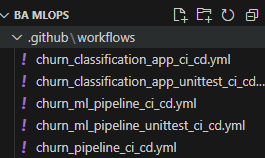

- Define Workflow Triggers (`on`): Within your YAML file, the first thing to configure is when the workflow should run. Example:
    - on: `push`: The workflow runs every time code is pushed to the repository (you can specify branches, e.g., branches: [main]).
    - on: `pull_request`: The workflow runs when a pull request is opened, synchronised, or re-opened.
    - on: `schedule`: You can set it to run at specific intervals, for instance, daily at a certain time to retrain a model.
    - on: `workflow_dispatch`: Allows for manual triggering from the "Actions" tab.

- Define Jobs (`jobs`): Workflows are made up of one or more "jobs." Each job runs on a separate virtual machine (called a "runner"). You'll define distinct jobs for different phases of your pipeline, e.g., `data_preprocessing`, `model_training`, `model_testing`, `model_deployment`. You specify the operating system for the runner, e.g., `runs-on: ubuntu-latest`.

- Define Steps within Jobs (`steps`): Each job consists of a sequence of "steps." These steps are individual tasks that are executed in order. Common Steps for ML CI/CD:

    - Checkout Code: Use the `actions/checkout@v4` Action to get your repository's code onto the runner.

    - Set up Environment: Use `actions/setup-python@v5` to configure the Python version required.

    - Install Dependencies: Run commands like `pip install -r requirements.txt` to install necessary libraries.

    - Run Scripts: Execute your Python scripts for data loading, feature engineering, model training, and evaluation (e.g., `python src/train_model.py`).

    - Run Tests: Execute unit tests, integration tests, and model performance tests (e.g., `pytest`).

    - Build/Push Docker Images: If you're containerising your model.


- Monitor Your Pipeline: Once configured, commit your YAML file to the repository. The workflow will trigger based on your defined `on` events. Go to the "Actions" tab in your GitHub repository. Here, you will see a list of all your workflow runs, their status (success, failure, in progress), and detailed logs for each step. This is your primary dashboard for observing the CI/CD process.

Here below an example of the YAML file for our project.


```
name: Churn ML Project CI/CD (Unittest)

on:
  push:
    branches: [main]
    paths:
      - '02 Building & Integrating ML Pipelines/churn_ml_project_unittest/**'
  pull_request:
    branches: [main]
    paths:
      - '02 Building & Integrating ML Pipelines/churn_ml_project_unittest/**'

jobs:
  test:
    name: Run Unit, Integration, Functional, and E2E Tests
    runs-on: ubuntu-latest

    defaults:
      run:
        # Set the working directory to the project root within the repository
        working-directory: "02 Building & Integrating ML Pipelines/churn_ml_project_unittest"

    steps:
    - name: Checkout Repository
      uses: actions/checkout@v3

    - name: Set up Python 3.11
      uses: actions/setup-python@v4
      with:
        python-version: '3.11'

    - name: Install Dependencies
      run: |
        pip install -r requirements.txt

    - name: Run Unit Tests
      run: |
        # Run unit tests
        # Assumes pure unit tests are in 'tests/unit/'
        python -m unittest discover tests/unit -p "test_*.py"

    - name: Run Integration Tests
      run: |
        # Run integration tests
        # Assumes integration tests are in 'tests/integration/' and end with '_integration.py'
        python -m unittest discover tests/integration -p "test_*.py"

    - name: Run Functional Tests
      run: |
        # Run functional tests
        # Assumes functional tests are in 'tests/functional/'
        python -m unittest discover tests/functional -p "test_*.py"

    - name: Run E2E Tests
      run: |
        # Run E2E tests
        # Assumes E2E tests are in 'tests/e2e/' and are named e.g., 'e2e_test.py'
        python -m unittest discover tests/e2e -p "test_*.py"

```

Here an example of the requirements.txt for this project:

```
# Core ML Libraries
pandas~=2.0.0      # For data manipulation and analysis
numpy~=1.24.0      # For numerical operations
scikit-learn~=1.2.0 # For machine learning models, preprocessing, and metrics
joblib~=1.2.0      # For saving and loading Python objects, especially scikit-learn models

```

### Pre-Push CI/CD Checklist

Here's a checklist to run through before pushing your changes to the main branch, especially when that push is set to trigger your CI/CD pipeline on GitHub. This helps catch common issues before the automation kicks in.

- [ ] Code Clean: All local changes committed, no temporary or debug code.

- [ ] Tests Pass: All relevant local tests run successfully.

- [ ] Dependencies Current: requirements.txt updated and tested if needed.

- [ ] Documentation Updated: README.md reflects any changes in usage or setup.

- [ ] Workflow Valid: CI/CD workflow files (.yml) are syntactically correct if modified.

- [ ] Clear Commit: Commit message concisely describes the changes.

- [ ] Final Review: Briefly checked all changes and confirming push to main.


After your checklist is complete:

- Prepare Changes: 

    - `git add .` (stages all your modified files)

    - `git commit -m "Your concise commit message"` (saves the changes locally with a note)

- Send to GitHub:

    - `git push origin main` (sends your committed changes to the main branch on GitHub)

- On GitHub, immediately after your push:

    - Your updated code appears in the repository.

    - GitHub Actions detects the change.

    - Your CI/CD workflow automatically starts running.

    - You can watch its progress and results in the "Actions" tab of your GitHub repository.


If no errors are detected... 

__Congratulations, you have deployed an ML CI/CD Process!__

## README.md

Serves as the front door to your project. It should be clear, comprehensive, and easy to navigate, allowing anyone (from a new collaborator to a future self) to quickly understand and engage with your work. `A good README.md` is like a clear project instruction manual and storefront. It should quickly tell you:

- What it is: A brief project summary and its purpose.

- How to set it up: Clear steps to get the code running locally, including dependencies (requirements.txt).

- How to use it: Examples and commands to run the main functionalities.

- What's inside (for ML): Basic info on the data and model, and key results.

- Who made it & how to contribute: Information for collaborators and contact.

- Legal bits: The project's license.

- Essentially, it answers "What is this?", "How do I get it working?", and "How do I use it?".


You can find an example of this file at the end of the notebook. 

# Customer Churn Prediction ML Pipeline with Comprehensive Testing

This project demonstrates a complete, production-style machine learning pipeline for predicting customer churn. Its primary focus is to showcase best practices in MLOps and software engineering, particularly a robust and layered testing strategy using Python's built-in `unittest` framework.

## Project Overview

The goal of this project is to train a classification model (Logistic Regression) on a customer churn dataset. The pipeline handles data loading, cleaning, feature engineering, model training, evaluation, and artifact logging.

The key highlight is the comprehensive test suite, which is structured to reflect the "Testing Pyramid," ensuring code quality, reliability, and maintainability.

## Project Structure

The project is organized into a clear and modular structure:

```
churn_ml_project_unittest_training1/
├── data/
│   └── raw/
│       └── churn_data.csv      # Raw input data
├── model_store/                # Output directory for saved models and logs
├── src/
│   ├── __init__.py
│   ├── config.py               # Centralized configuration for the pipeline
│   ├── data_loader.py          # Module for loading data
│   ├── model.py                # Model class wrapper and metric functions
│   ├── preprocessing.py        # Data cleaning and feature engineering functions
│   └── pipeline.py             # Main pipeline orchestration logic
├── tests/
│   ├── __init__.py
│   ├── unit/                   # Unit tests for individual functions
│   ├── integration/            # Integration tests for component interactions
│   ├── functional/             # Functional tests for user-facing behavior
│   └── e2e/                    # End-to-end test for the full pipeline run
├── main.py                     # Main entrypoint to run the pipeline
└── requirements.txt            # Project dependencies
```

## Key Concepts Demonstrated

*   **Modular Code**: Each part of the ML pipeline (data loading, preprocessing, modeling) is separated into its own module for clarity and reusability.
*   **Centralized Configuration**: Key parameters, file paths, and column names are managed in `src/config.py` for easy modification.
*   **MLOps Best Practices**: The pipeline saves the trained model and logs key metrics and metadata from each run, which is crucial for experiment tracking and reproducibility.
*   **Layered Testing Strategy**: The project implements a full spectrum of tests:
    *   **Unit Tests**: Fast tests that verify the smallest pieces of code (individual functions) in isolation.
    *   **Integration Tests**: Tests that ensure different components of the pipeline work together correctly (e.g., data loading and cleaning).
    *   **Functional Tests**: Tests that verify the application's entrypoint (`main.py`) from a user's perspective, checking its orchestration logic and console output.
    *   **End-to-End (E2E) Tests**: A full run of the pipeline on a small, real dataset to ensure the entire system works as a whole and produces the expected final artifacts.

## Setup and Installation

1.  **Clone the repository:**
    ```bash
    git clone <repository-url>
    cd churn_ml_project_unittest_training1
    ```

2.  **Create and activate a virtual environment (recommended):**
    ```bash
    python -m venv venv
    source venv/bin/activate  # On Windows, use `venv\Scripts\activate`
    ```

3.  **Install the dependencies:**
    ```bash
    pip install -r requirements.txt
    ```

## How to Run

### Running the ML Pipeline

To execute the entire machine learning pipeline, run the `main.py` script from the project's root directory.

```bash
python main.py
```

This will:
1.  Load the raw data from `data/raw/churn_data.csv`.
2.  Execute the full cleaning, transformation, and training pipeline.
3.  Save the trained model to `model_store/churn_model.joblib`.
4.  Save the run metrics and metadata to `model_store/log.json`.

### Running the Tests

The project uses Python's `unittest` framework. You can run all tests using the `discover` command from the root directory.

**Run all tests:**
```bash
python -m unittest discover -s tests -v
```

**Run a specific type of test:**

*   **Unit Tests:**
    ```bash
    python -m unittest discover -s tests/unit -v
    ```
*   **Integration Tests:**
    ```bash
    python -m unittest discover -s tests/integration -v
    ```
*   **Functional Tests:**
    ```bash
    python -m unittest discover -s tests/functional -v
    ```
*   **End-to-End Test:**
    ```bash
    python -m unittest discover -s tests/e2e -v
    ```

**Run a specific test file:**
```bash
python -m unittest tests/unit/test_model.py -v
```

---

This project serves as a robust template for building and validating production-ready machine learning applications.


